### `Description`

### `Background & Context`

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards


### `Objective`

1.	Explore and visualize the dataset.
2.	Build a classification model to predict if the customer is going to churn or not
3.	Optimize the model using appropriate techniques
4.	Generate a set of insights and recommendations that will help the bank


### `Data Dictionary`

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio
 

In [114]:
!pip install xgboost 
!pip install -U imbalanced-learn
!pip install delayed
!pip install imblearn -U
!pip install --upgrade scikit-learn
!pip install scikit-learn==0.23.1
!pip install imbalanced-learn==0.7.0

Requirement already up-to-date: imbalanced-learn in c:\users\vsudh\anaconda3\lib\site-packages (0.8.0)
Requirement already up-to-date: imblearn in c:\users\vsudh\anaconda3\lib\site-packages (0.0)
Requirement already up-to-date: scikit-learn in c:\users\vsudh\anaconda3\lib\site-packages (0.24.1)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\vsudh\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Import the Dataset

In [39]:
data=pd.read_csv('BankChurners.csv')
df_Bank=data.copy()

# Checking the initial observations

In [40]:
df_Bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3   12691.00000   
1              44  ...                      2    8256.00000   
2              36  ...                      0    3418.00000   
3              34  ...                      1    3313.00000   
4              21  ...                      0    4716.00000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777      11914.00000               1.33500   
1                  864       7392.00000               1.54100   
2                    0       3418.00000               2.59400   
3                 2517        796.00000               1.40500   
4                    0       4716.00000               2.17500   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42              1.62500   
1             1291              33              3.71400   
2             1887              20              2.33300   
3             1171              20              2.33300   
4              816              28              2.50000   

   Avg_Utilization_Ratio  Unnamed: 21  
0                0.06100          nan  
1                0.10500          nan  
2                0.00000          nan  
3                0.76000          nan  
4                0.00000          nan  

[5 rows x 22 columns]

# Basic details of dataset

In [41]:
df_Bank.shape

(10127, 22)

In [42]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Points to be Noted:

- The dataset has 10127 rows and 22 columns.
- Most of the data-types are either int64 or float64.
- There are 6 columns (Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category and Card_Category) have data-type as object.


### Adjust the Datatype Object:

In [43]:
df_Bank["Attrition_Flag"] = df_Bank["Attrition_Flag"].astype("category")
df_Bank["Gender"] = df_Bank["Gender"].astype("category")
df_Bank["Education_Level"] = df_Bank["Education_Level"].astype("category")
df_Bank["Marital_Status"] = df_Bank["Marital_Status"].astype("category")
df_Bank["Income_Category"] = df_Bank["Income_Category"].astype("category")
df_Bank["Card_Category"] = df_Bank["Card_Category"].astype("category")

In [44]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

### Missing Values:

In [45]:
df_Bank.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

No missing values in our dataset here.

### Data Exploration:

In [46]:
# Using this to supress the display in scientific format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [47]:
df_Bank.describe().T

count            mean            std  \
CLIENTNUM                10127.00000 739177606.33366 36903783.45023   
Customer_Age             10127.00000        46.32596        8.01681   
Dependent_count          10127.00000         2.34620        1.29891   
Months_on_book           10127.00000        35.92841        7.98642   
Total_Relationship_Count 10127.00000         3.81258        1.55441   
Months_Inactive_12_mon   10127.00000         2.34117        1.01062   
Contacts_Count_12_mon    10127.00000         2.45532        1.10623   
Credit_Limit             10127.00000      8631.95370     9088.77665   
Total_Revolving_Bal      10127.00000      1162.81406      814.98734   
Avg_Open_To_Buy          10127.00000      7469.13964     9090.68532   
Total_Amt_Chng_Q4_Q1     10127.00000         0.75994        0.21921   
Total_Trans_Amt          10127.00000      4404.08630     3397.12925   
Total_Trans_Ct           10127.00000        64.85869       23.47257   
Total_Ct_Chng_Q4_Q1      10127.00000         0.71222        0.23809   
Avg_Utilization_Ratio    10127.00000         0.27489        0.27569   
Unnamed: 21                  0.00000             nan            nan   

                                     min             25%             50%  \
CLIENTNUM                708082083.00000 713036770.50000 717926358.00000   
Customer_Age                    26.00000        41.00000        46.00000   
Dependent_count                  0.00000         1.00000         2.00000   
Months_on_book                  13.00000        31.00000        36.00000   
Total_Relationship_Count         1.00000         3.00000         4.00000   
Months_Inactive_12_mon           0.00000         2.00000         2.00000   
Contacts_Count_12_mon            0.00000         2.00000         2.00000   
Credit_Limit                  1438.30000      2555.00000      4549.00000   
Total_Revolving_Bal              0.00000       359.00000      1276.00000   
Avg_Open_To_Buy                  3.00000      1324.50000      3474.00000   
Total_Amt_Chng_Q4_Q1             0.00000         0.63100         0.73600   
Total_Trans_Amt                510.00000      2155.50000      3899.00000   
Total_Trans_Ct                  10.00000        45.00000        67.00000   
Total_Ct_Chng_Q4_Q1              0.00000         0.58200         0.70200   
Avg_Utilization_Ratio            0.00000         0.02300         0.17600   
Unnamed: 21                          nan             nan             nan   

                                     75%             max  
CLIENTNUM                773143533.00000 828343083.00000  
Customer_Age                    52.00000        73.00000  
Dependent_count                  3.00000         5.00000  
Months_on_book                  40.00000        56.00000  
Total_Relationship_Count         5.00000         6.00000  
Months_Inactive_12_mon           3.00000         6.00000  
Contacts_Count_12_mon            3.00000         6.00000  
Credit_Limit                 11067.50000     34516.00000  
Total_Revolving_Bal           1784.00000      2517.00000  
Avg_Open_To_Buy               9859.00000     34516.00000  
Total_Amt_Chng_Q4_Q1             0.85900         3.39700  
Total_Trans_Amt               4741.00000     18484.00000  
Total_Trans_Ct                  81.00000       139.00000  
Total_Ct_Chng_Q4_Q1              0.81800         3.71400  
Avg_Utilization_Ratio            0.50300         0.99900  
Unnamed: 21                          nan             nan

Variables like Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1 have outliers
Some clients dont have any dependents. 

In [48]:
df_Bank.describe(include=['category','bool'])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [49]:
df_Bank['Attrition_Flag'].unique()

['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Existing Customer', 'Attrited Customer']

In [50]:
df_Bank['Gender'].unique()

['M', 'F']
Categories (2, object): ['M', 'F']

In [51]:
df_Bank['Education_Level'].unique()

['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']

In [52]:
df_Bank['Marital_Status'].unique()

['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Married', 'Single', 'Unknown', 'Divorced']

In [53]:
df_Bank['Income_Category'].unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']

In [54]:
df_Bank['Card_Category'].unique()

['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Silver', 'Platinum']

    Almost 80% of our customers are still with us. Around 20% attrited.
    Males and Females are almost equally distributed.
    Graduates form the highest number of our clients.
    Almost 40% of our clients are married.
    Almost 90% of our clients have Blue card.

# Exploratory Data Analysis

### Univariate Analysis

### Variable Customer Age:

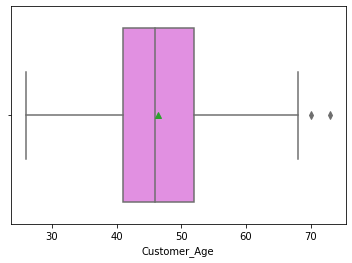

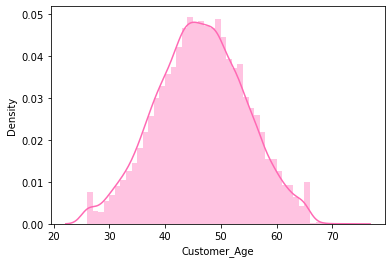

In [55]:
sns.boxplot(df_Bank['Customer_Age'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Customer_Age'],color='hotpink')
plt.show()

    Variable Age's distribution looks normal.
    There are a couple of outliers in this variable.
    Average age of our customers is around 45.

### Variable Months_on_book:

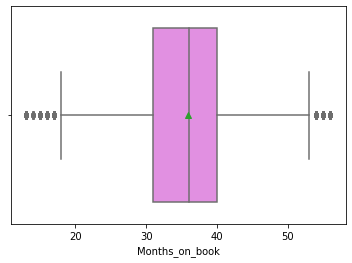

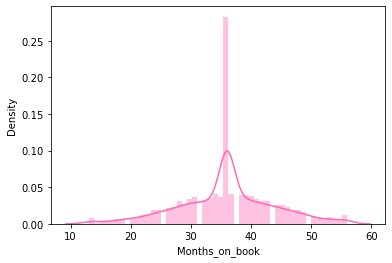

In [56]:
sns.boxplot(df_Bank['Months_on_book'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Months_on_book'],color='hotpink')
plt.show()

    There are some outliers in this variable.
    Majority of the values are in 35 or 36 months.


### Variable Credit_Limit:

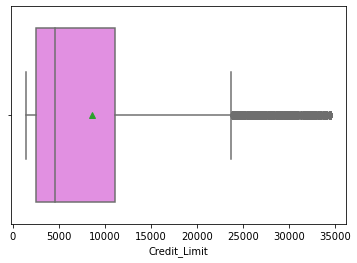

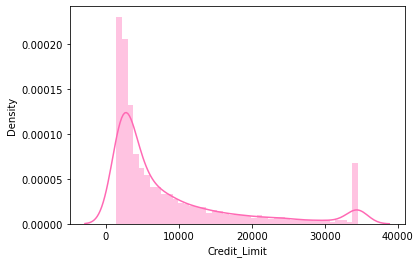

In [57]:
sns.boxplot(df_Bank['Credit_Limit'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Credit_Limit'],color='hotpink')
plt.show()

    There a lot of outliers in this variable above 25,000
    Lot of clients are stacked in the Credit Limit 33,000-34,000

### Variable Total_Revolving_Bal

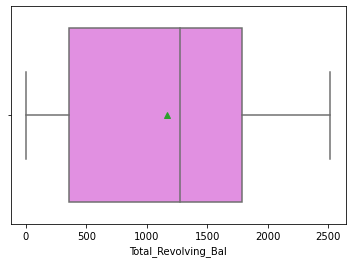

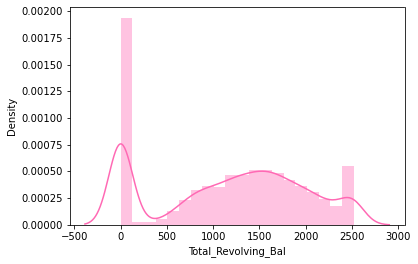

In [58]:
sns.boxplot(df_Bank['Total_Revolving_Bal'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Total_Revolving_Bal'],color='hotpink')
plt.show()

    There are no outliers in this variable.
    Data is not normally distributed. A lot of clients with 0 balance. A chunk of them with highest around 2500.

### Variable Avg_Open_To_Buy:

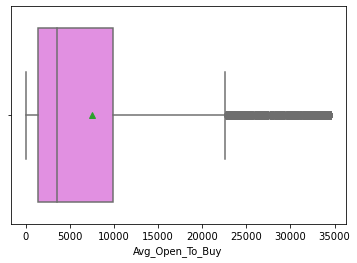

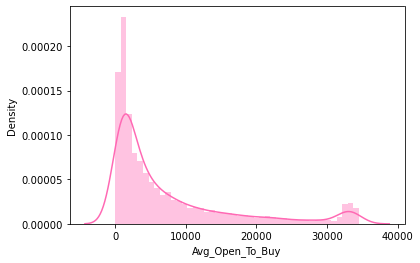

In [59]:
sns.boxplot(df_Bank['Avg_Open_To_Buy'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Avg_Open_To_Buy'],color='hotpink')
plt.show()

    Lot of outliers in this variable above 20,000.
    Data is not normally distributed. Most of the clients have 0-1000 buying power.

### Variable Total_Amt_Chng_Q4_Q1:

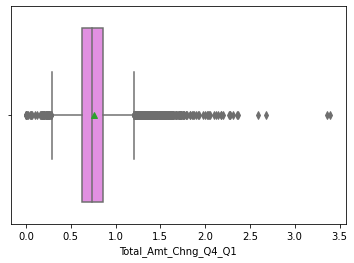

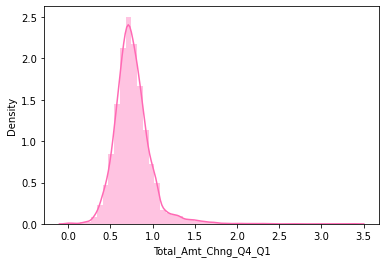

In [60]:
sns.boxplot(df_Bank['Total_Amt_Chng_Q4_Q1'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Total_Amt_Chng_Q4_Q1'],color='hotpink')
plt.show()

    Lot of outliers in this variables on both extremes.
    Data is right skewed. Most of the values are in 0.5-1


### Variable Total_Trans_Amt:

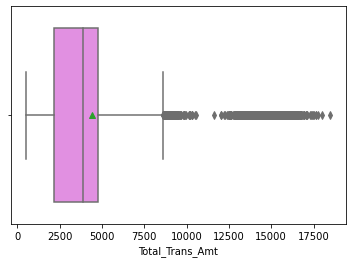

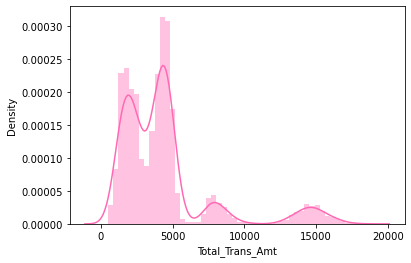

In [61]:
sns.boxplot(df_Bank['Total_Trans_Amt'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Total_Trans_Amt'],color='hotpink')
plt.show()

    Lot of outliers in this variable
    Right skewed variable. Most of the transaction amounts are from 0-5000

### Variable Total_Trans_Ct:

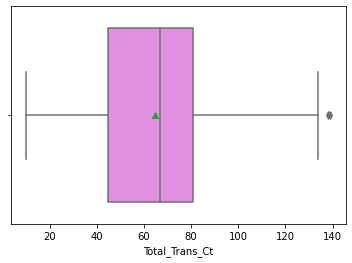

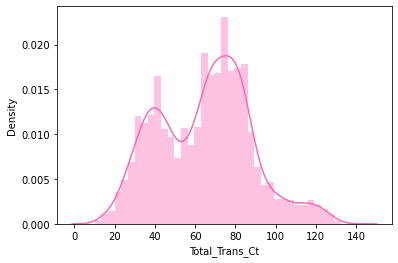

In [62]:
sns.boxplot(df_Bank['Total_Trans_Ct'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Total_Trans_Ct'],color='hotpink')
plt.show()

    Single outlier value in this variable.
    Data looks almost normally distributed.

### Variable Total_Ct_Chng_Q4_Q1:

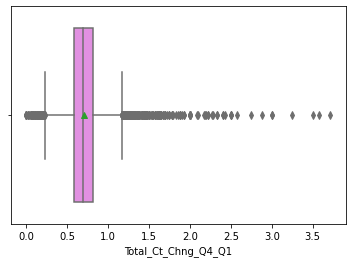

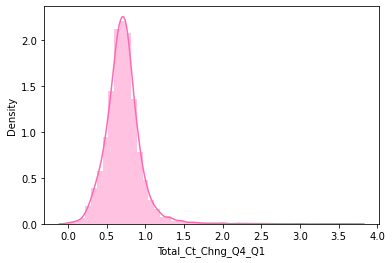

In [63]:
sns.boxplot(df_Bank['Total_Ct_Chng_Q4_Q1'], showmeans=True, color='violet')
plt.show()

sns.distplot(df_Bank['Total_Ct_Chng_Q4_Q1'],color='hotpink')
plt.show()

    Many outliers in this variable on both extremes.
    Most of the data is between 0.3-1

# Countplots for categorical variables - Univariate Analysis

### Variable Attrition_Flag:

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

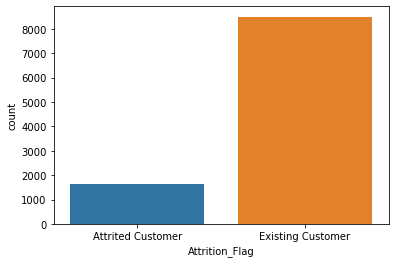

In [64]:
display(df_Bank['Attrition_Flag'].value_counts())
sns.countplot(df_Bank['Attrition_Flag'])
plt.show()

Almost 80% of customers are existing. 20% attrited.

### Variable Gender:

F    5358
M    4769
Name: Gender, dtype: int64

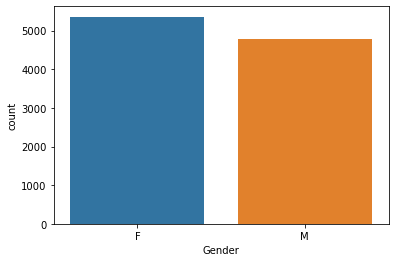

In [65]:
display(df_Bank['Gender'].value_counts())
sns.countplot(df_Bank['Gender'])
plt.show()

Equally distributed between males and females.

### Variable Education_Level:

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

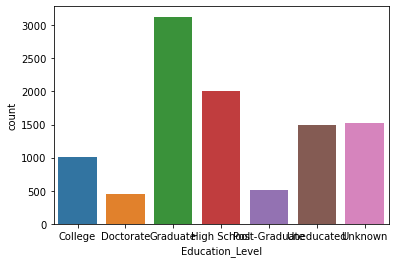

In [66]:
display(df_Bank['Education_Level'].value_counts())
sns.countplot(df_Bank['Education_Level'])
plt.show()

Majority are graduates. High school and uneducated seems to be next highest.

### Variable Marital_Status:

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

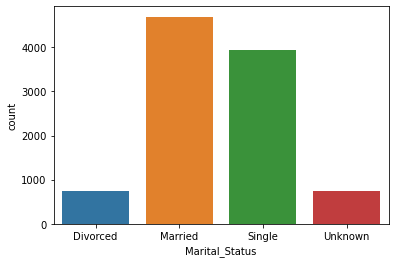

In [67]:
display(df_Bank['Marital_Status'].value_counts())
sns.countplot(df_Bank['Marital_Status'])
plt.show()

Majority of our clients are married or single. Divorced or unknown seems to be very less.

### Variable Income_Category:

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

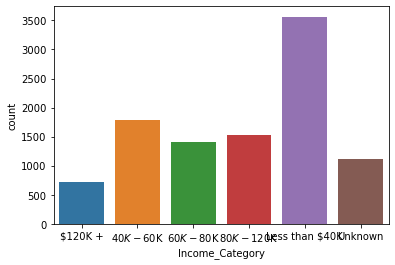

In [68]:
display(df_Bank['Income_Category'].value_counts())
sns.countplot(df_Bank['Income_Category'])
plt.show()

Most of the clients earn less than $40k. The next highest is 40k-60k. Rest of the segments are almost equally distributed.

### Variable Card_Category:

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

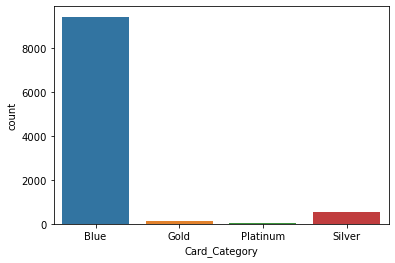

In [69]:
display(df_Bank['Card_Category'].value_counts())
sns.countplot(df_Bank['Card_Category'])
plt.show()

More than 90% of customers have a blue card.

### Variable Dependent_count:

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

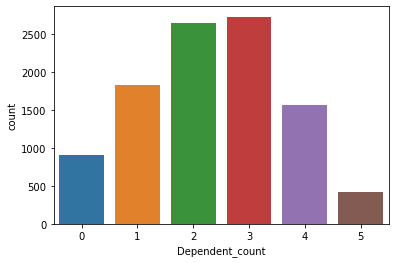

In [70]:
display(df_Bank['Dependent_count'].value_counts())
sns.countplot(df_Bank['Dependent_count'])
plt.show()

More or less equally distributed. Most of the clients seem to have 1 or 2 or 3 dependednts.

### Variable Total_Relationship_Count:

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

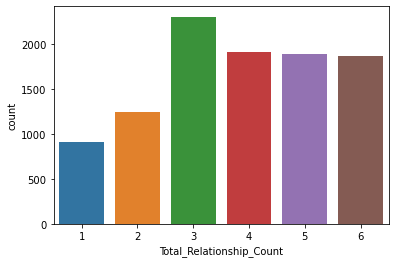

In [72]:
display(df_Bank['Total_Relationship_Count'].value_counts())
sns.countplot(df_Bank['Total_Relationship_Count'])
plt.show()

Most of our clients have atleast 3 products which is a good thing.

### Variable Months_Inactive_12_mon:

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

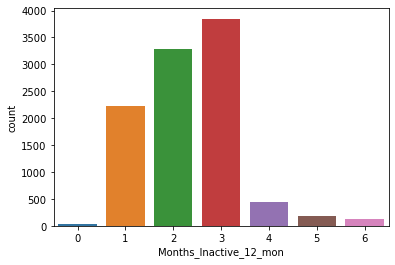

In [73]:
display(df_Bank['Months_Inactive_12_mon'].value_counts())
sns.countplot(df_Bank['Months_Inactive_12_mon'])
plt.show()

Most of our clients seem to be inactive for 3 months. A good chunk of them have been for 2 months as well.

### Variable Contacts_Count_12_mon:

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

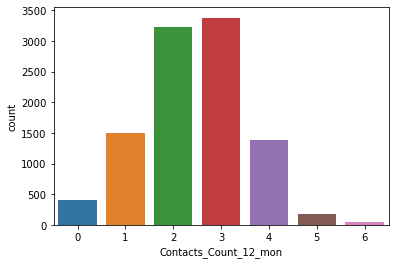

In [74]:
display(df_Bank['Contacts_Count_12_mon'].value_counts())
sns.countplot(df_Bank['Contacts_Count_12_mon'])
plt.show()

Number of times customer contacted us seem to be 2 or 3 times for most of them.

### Bivariate Analysis:

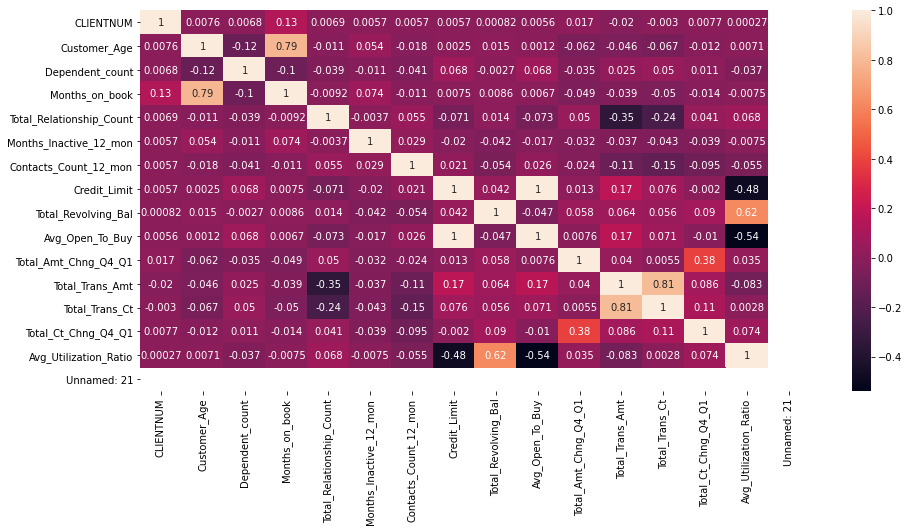

In [75]:
plt.figure(figsize=(15,7))
sns.heatmap(df_Bank.corr(),annot=True)
plt.show()

    Total Revolving Balance shows high correlation with Average Utilization Ratio
    Tot_Amt_Chng_Q4_Q1 shows high correlation with Tot_Ct_Chng_Q4_Q1 which is I think already expected
    Credit Limit has some correlation witj transaction amount
    Months on Book and Cusomter Age has high correlation which is a no brainer. Not much focus on this point.

# Box plots for these interval variables with Target Variable

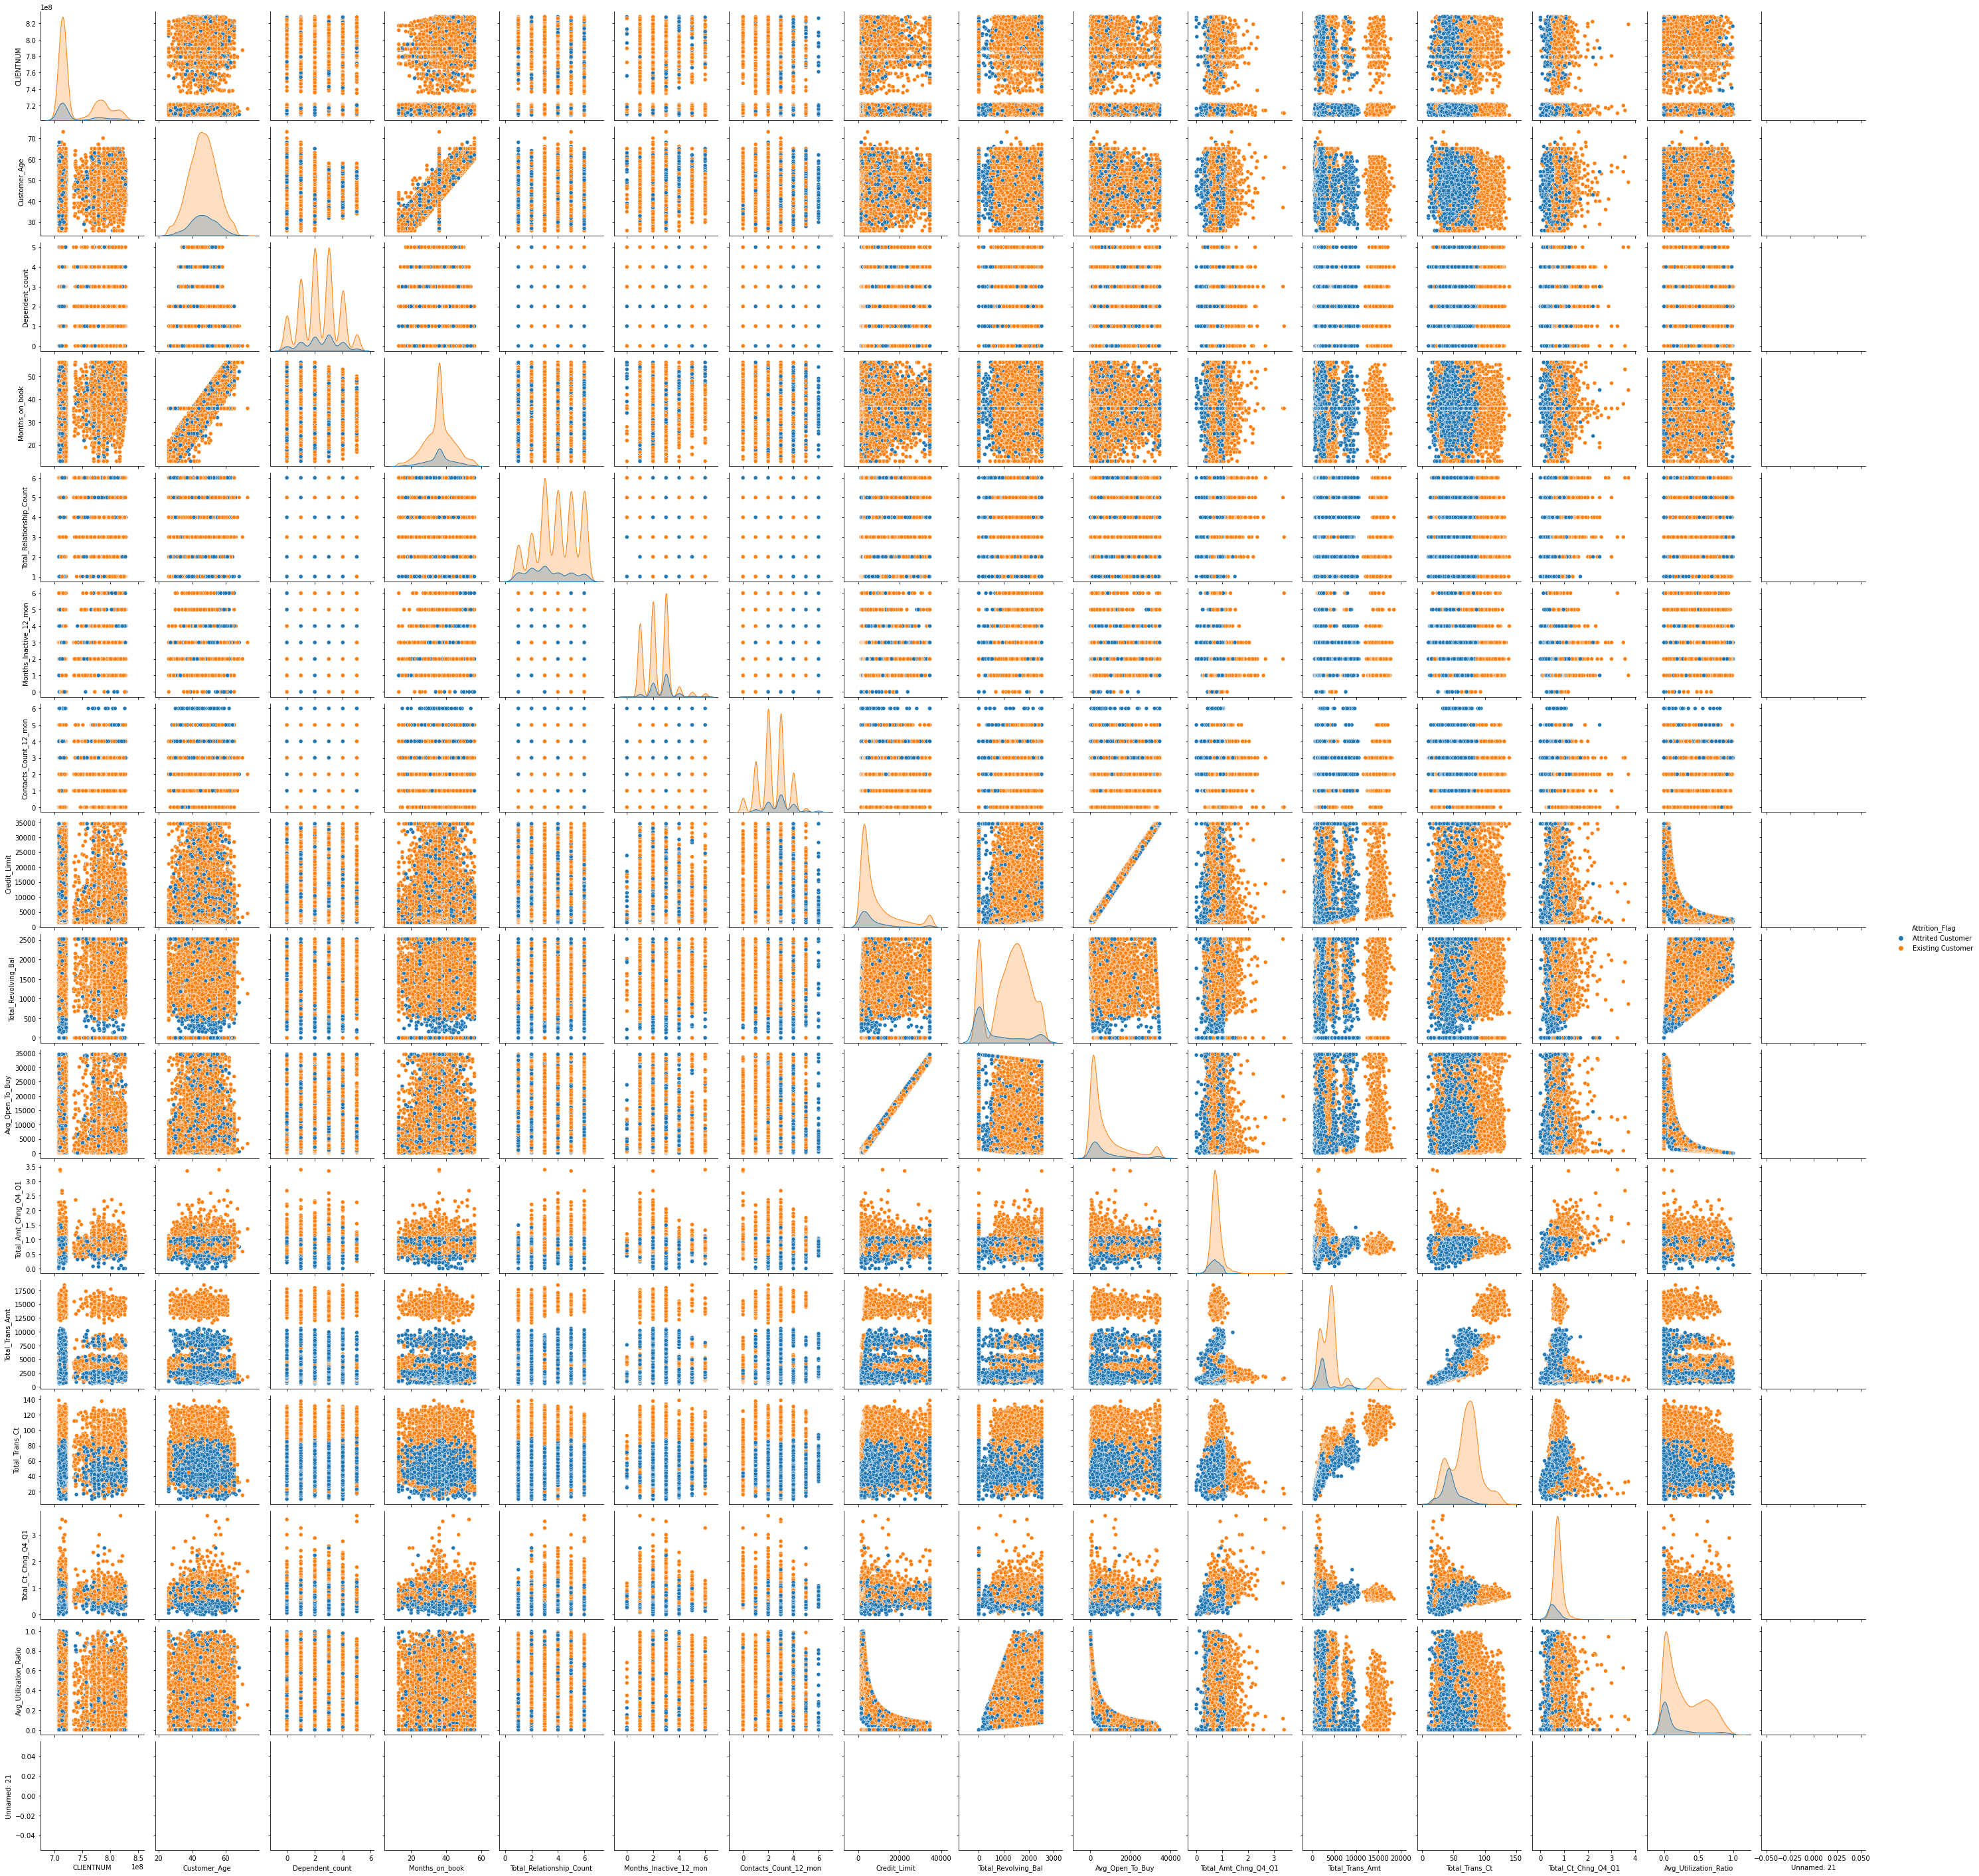

In [76]:
sns.pairplot(data=df_Bank,hue="Attrition_Flag")
plt.show()

#### Attrition_Flag VS Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1

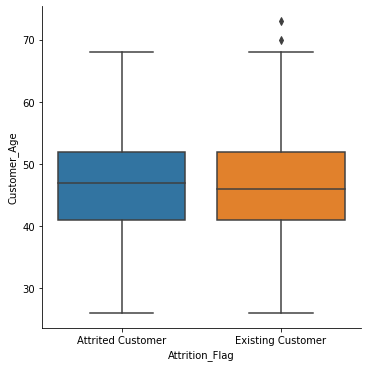

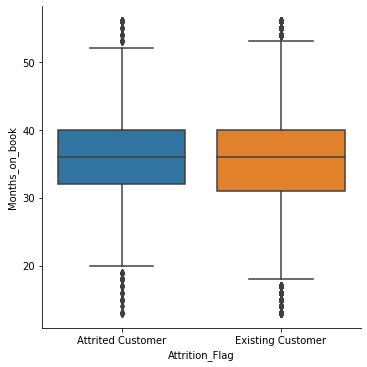

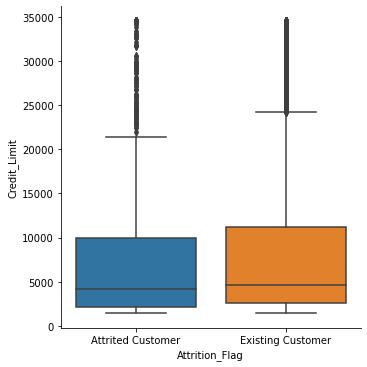

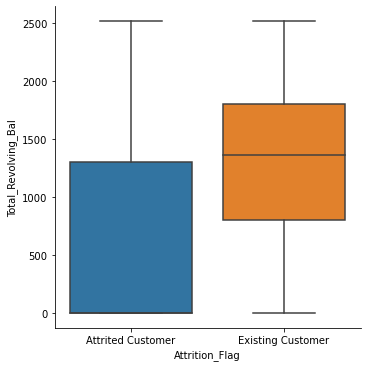

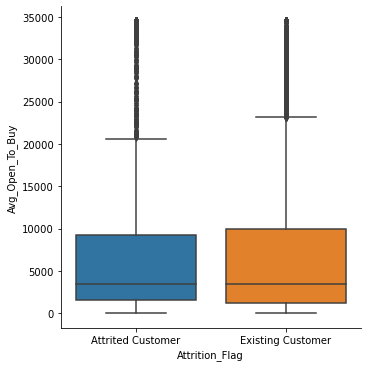

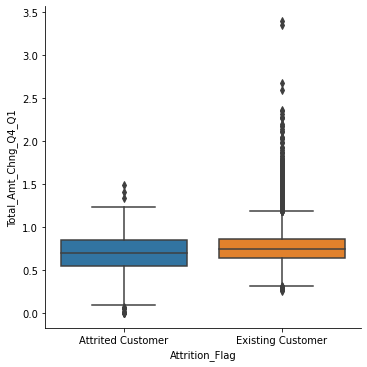

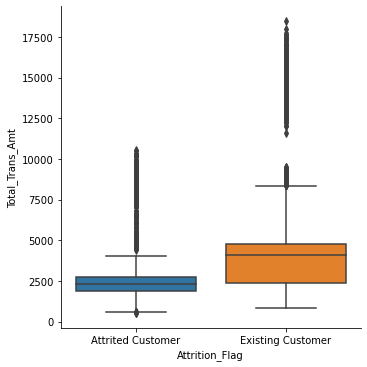

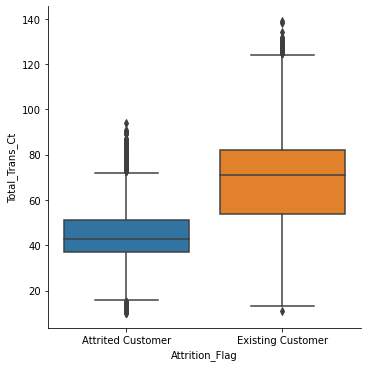

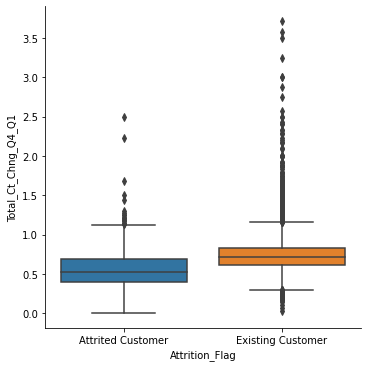

In [77]:
sns.catplot(x="Attrition_Flag", y="Customer_Age", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Months_on_book", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Credit_Limit", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Total_Revolving_Bal", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Avg_Open_To_Buy", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Total_Trans_Amt", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Total_Trans_Ct", kind="box", data=df_Bank)
sns.catplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", kind="box", data=df_Bank)


    Customer Age doesnt seem to have much effect on whether a customer is retained or not.
    Same with the number of months they have been with us.
    Customers with higher credit limit seem to have higher probability of being with us.
    Total Revolving Balance i.e balance that is customer is using regularly seems to be higher for existing customers which makes sense.
    Abg_Open_To_Buy doesnt seem to have much effect on attrition.
    Amount hasnt changed much from Q4 to Q1 for existing customers. 
    Transaction amount and count is obviously higher for existing customers.  

In [78]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df_Bank['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_Bank['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Attrition_Flag VS Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


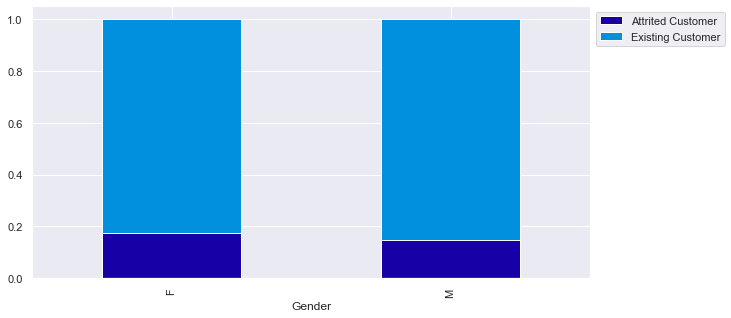

In [79]:
stacked_plot(df_Bank['Gender'])

Males and Females are equally distributed. Nothing to note here.

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


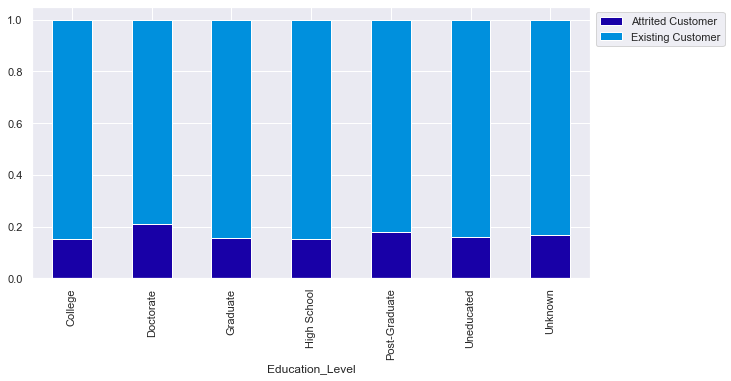

In [80]:
stacked_plot(df_Bank['Education_Level'])

Clients who have Doctorates seem to be slightly higher than others who have attrited.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


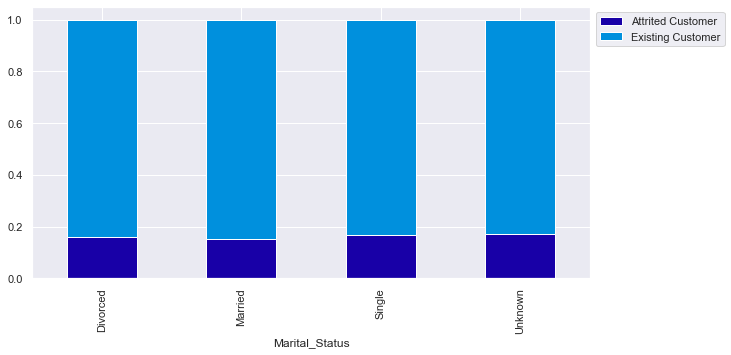

In [81]:
stacked_plot(df_Bank['Marital_Status'])

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


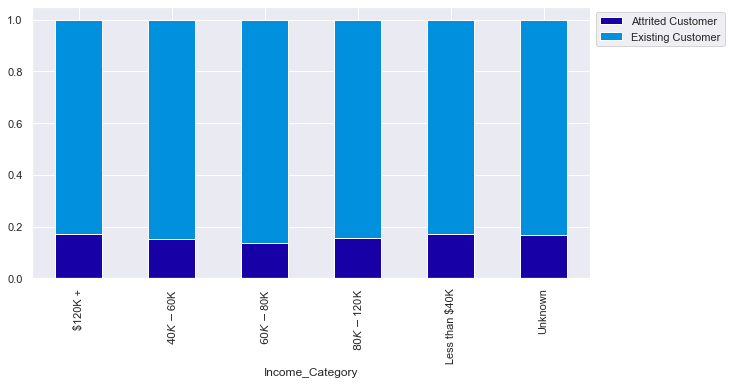

In [82]:
stacked_plot(df_Bank['Income_Category'])

Attrition seems to be slightly higher where clients' salary is less than 40k or 80k-120k

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


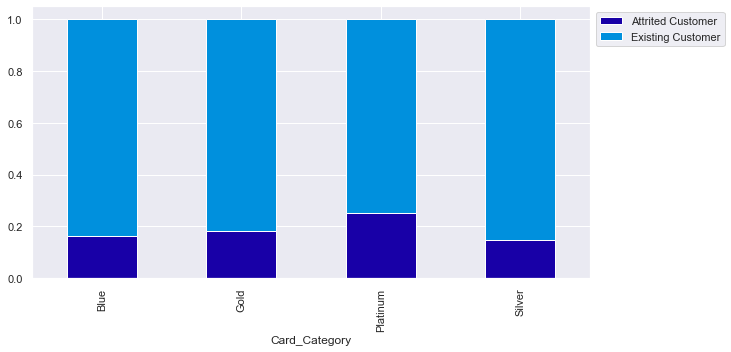

In [83]:
stacked_plot(df_Bank['Card_Category'])

Platinum members seem to have attrited lot more than other members. Point to be noted.

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


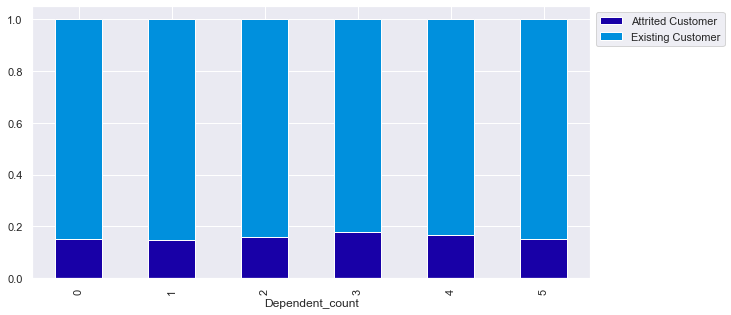

In [84]:
stacked_plot(df_Bank['Dependent_count'])

Clients with 3 dependents seem to have higher attrition, not by much. Possibly increased expenses as there are more family members.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


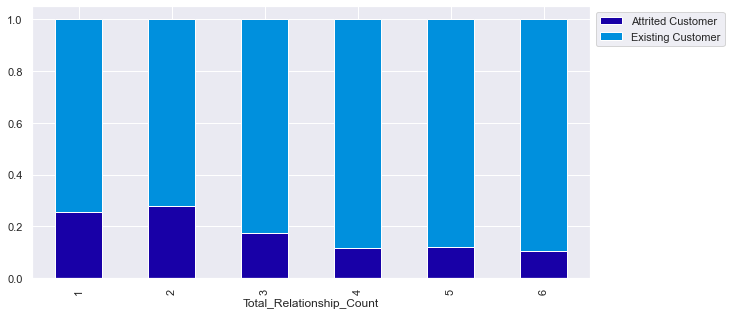

In [85]:
stacked_plot(df_Bank['Total_Relationship_Count'])

Clients with only 1 or 2 products with us seem to have attrited a lot more compared to other segments.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


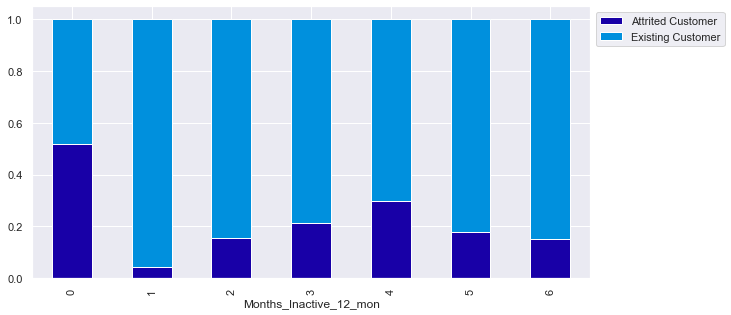

In [86]:
stacked_plot(df_Bank['Months_Inactive_12_mon'])

Clients who have been active all the months have attrited the most, surprisingly. 

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


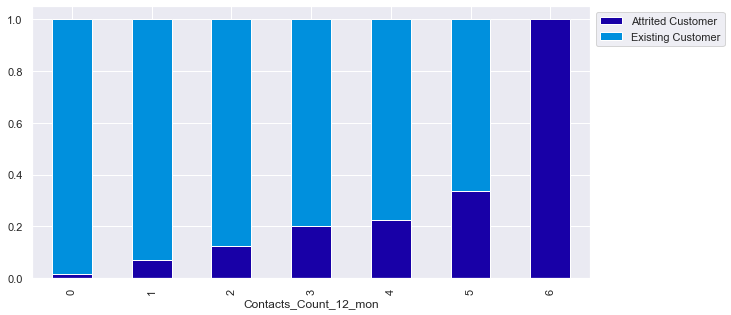

In [87]:
stacked_plot(df_Bank['Contacts_Count_12_mon'])

Interesting point here. As the number of contacts keeps increasing the attirtion also increases. May be our customer service is awful?

### Data Preparation:

In [88]:
#Creating a new variable from Attrition Flag
df_Bank['Attrition_Ind'] = np.where(df_Bank['Attrition_Flag']== 'Existing Customer', 1, 0)
df_Bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...   12691.00000                  777      11914.00000   
1              44  ...    8256.00000                  864       7392.00000   
2              36  ...    3418.00000                    0       3418.00000   
3              34  ...    3313.00000                 2517        796.00000   
4              21  ...    4716.00000                    0       4716.00000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0               1.33500             1144              42              1.62500   
1               1.54100             1291              33              3.71400   
2               2.59400             1887              20              2.33300   
3               1.40500             1171              20              2.33300   
4               2.17500              816              28              2.50000   

   Avg_Utilization_Ratio  Unnamed: 21  Attrition_Ind  
0                0.06100          nan              1  
1                0.10500          nan              1  
2                0.00000          nan              1  
3                0.76000          nan              1  
4                0.00000          nan              1  

[5 rows x 23 columns]

In [89]:
dummy_df_Bank=pd.get_dummies(df_Bank,columns=['Education_Level','Marital_Status','Income_Category','Gender','Card_Category'],drop_first=True)
dummy_df_Bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age  Dependent_count  \
0  768805383  Existing Customer            45                3   
1  818770008  Existing Customer            49                5   
2  713982108  Existing Customer            51                3   
3  769911858  Existing Customer            40                4   
4  709106358  Existing Customer            40                3   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  ...  \
0                      3   12691.00000                  777  ...   
1                      2    8256.00000                  864  ...   
2                      0    3418.00000                    0  ...   
3                      1    3313.00000                 2517  ...   
4                      0    4716.00000                    0  ...   

   Marital_Status_Unknown  Income_Category_$40K - $60K  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       1                            0   
4                       0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  Gender_M  \
0                               0                        0         1   
1                               1                        0         0   
2                               0                        0         1   
3                               1                        0         0   
4                               0                        0         1   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0                   0                       0                     0  
1                   0                       0                     0  
2                   0                       0                     0  
3                   0                       0                     0  
4                   0                       0                     0  

[5 rows x 36 columns]

In [90]:
dummy_df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   CLIENTNUM                       10127 non-null  int64   
 1   Attrition_Flag                  10127 non-null  category
 2   Customer_Age                    10127 non-null  int64   
 3   Dependent_count                 10127 non-null  int64   
 4   Months_on_book                  10127 non-null  int64   
 5   Total_Relationship_Count        10127 non-null  int64   
 6   Months_Inactive_12_mon          10127 non-null  int64   
 7   Contacts_Count_12_mon           10127 non-null  int64   
 8   Credit_Limit                    10127 non-null  float64 
 9   Total_Revolving_Bal             10127 non-null  int64   
 10  Avg_Open_To_Buy                 10127 non-null  float64 
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64 
 12  Total_Trans_Amt   

In [91]:
column_names = list(dummy_df_Bank.columns)
column_names.remove('Attrition_Ind')
feature_names = column_names
print(feature_names)

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Unnamed: 21', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Gender_M', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']


## Model Building:

### Data Splitting:

In [92]:
X = dummy_df_Bank.drop(["Attrition_Ind","Attrition_Flag","CLIENTNUM","Unnamed: 21"] , axis=1)
y = dummy_df_Bank.pop("Attrition_Ind")

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

###### Since, our bank wants to reduce customer attrition we will look at Recall metric for evaluation.

In [94]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [95]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression:

In [96]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

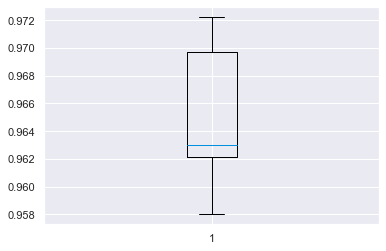

In [97]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Performance ranges from 0.95 to 0.97 recall.

Accuracy on training set :  0.8900959367945824
Accuracy on test set :  0.8881210924646266
Recall on training set :  0.9638594721801984
Recall on test set :  0.969031752254018
Precision on training set :  0.9104477611940298
Precision on test set :  0.9045005488474204


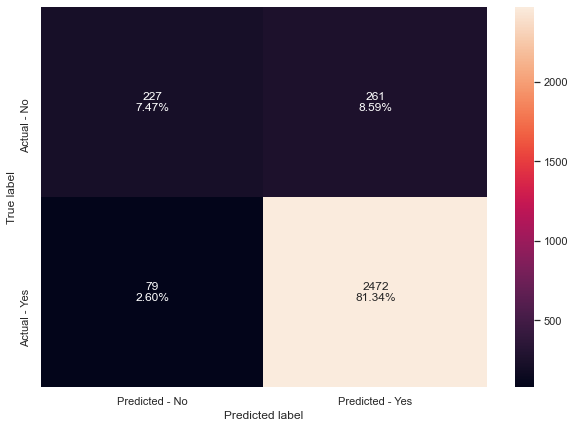

In [98]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

Model seems to be performing well with good recall score.

### Oversampling train data using SMOTE

In [116]:
from imblearn.over_sampling import SMOTE

In [118]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 5949
Before UpSampling, counts of label 'No': 1139 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 32)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [119]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

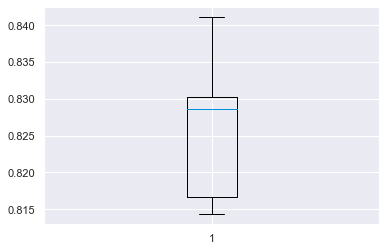

In [120]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Performance is 0.81 to 0.84 recall.

Accuracy on training set :  0.8009749537737435
Accuracy on test set :  0.7910496873971701
Recall on training set :  0.800302571860817
Recall on test set :  0.8004704037632301
Precision on training set :  0.8013802390170005
Precision on test set :  0.9418819188191881


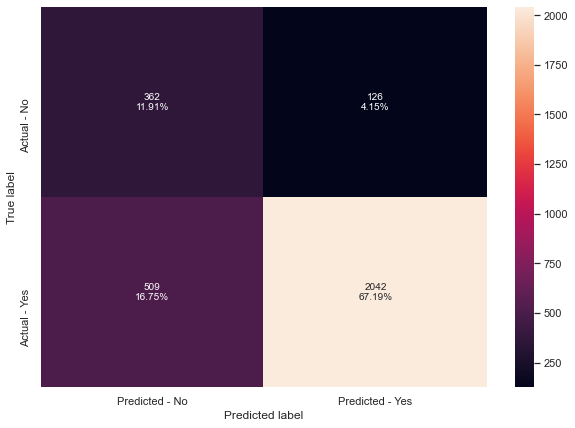

In [121]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

Model performance looks good. Recall score has decreased from the initial model.

### Regularization

In [122]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7043200537905531
Accuracy on test set :  0.8068443566962816
Recall on training set :  0.8524121701126239
Recall on test set :  0.8573108584868679
Precision on training set :  0.6576319543509273
Precision on test set :  0.9074688796680498


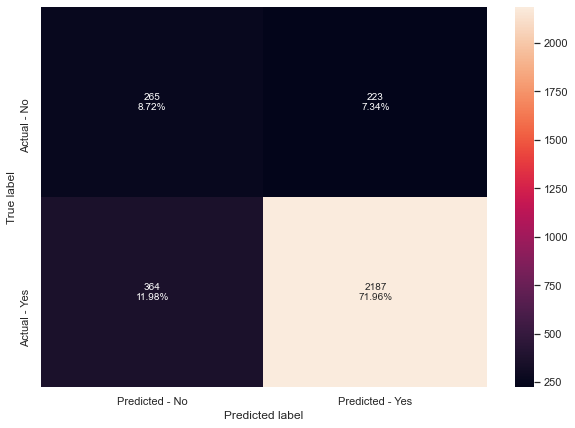

In [123]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

Recall score has increased slightly after regularization

### Undersampling train data using SMOTE

In [125]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [126]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5949
Before Under Sampling, counts of label 'No': 1139 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 32)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [127]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

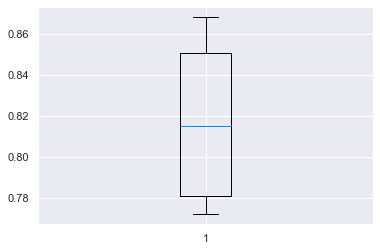

In [128]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Performance is between 0.78 to 0.87 recall score.

Accuracy on training set :  0.8143107989464442
Accuracy on test set :  0.7999341888779203
Recall on training set :  0.8050921861281826
Recall on test set :  0.8012544100352803
Precision on training set :  0.8202146690518783
Precision on test set :  0.9529137529137529


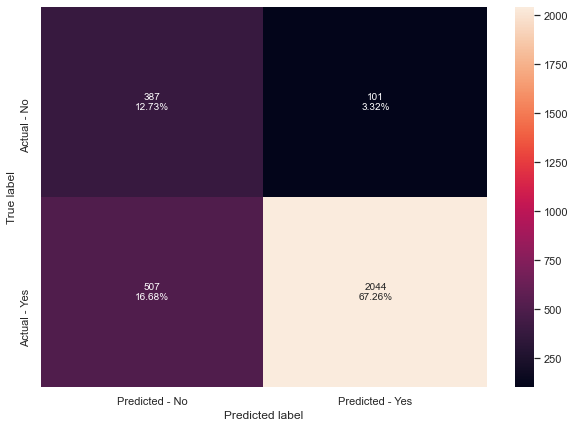

In [129]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

Model performance looks good but the recall score hasnt changed much from oversampling.

In [130]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [131]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [132]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [133]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  Train_Accuracy  \
0                                Logistic Regression         0.89010   
1            Logistic Regression on Oversampled data         0.80097   
2  Logistic Regression-Regularized (Oversampled d...         0.70432   
3           Logistic Regression on Undersampled data         0.81431   

   Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0        0.88812       0.96386      0.96903          0.91045         0.90450  
1        0.79105       0.80030      0.80047          0.80138         0.94188  
2        0.80684       0.85241      0.85731          0.65763         0.90747  
3        0.79993       0.80509      0.80125          0.82021         0.95291

Initial LR, Oversample Data and undersampled data has given a good performance on the dataset. 

### Finding the coefficients

In [134]:
log_odds = lr.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])

coef
Customer_Age                   -0.03534
Dependent_count                -0.36051
Months_on_book                  0.00186
Total_Relationship_Count        0.36649
Months_Inactive_12_mon         -0.45922
Contacts_Count_12_mon          -0.54341
Credit_Limit                    0.00030
Total_Revolving_Bal             0.00060
Avg_Open_To_Buy                -0.00029
Total_Amt_Chng_Q4_Q1            0.02141
Total_Trans_Amt                -0.00043
Total_Trans_Ct                  0.10800
Total_Ct_Chng_Q4_Q1             0.11182
Avg_Utilization_Ratio          -0.00952
Education_Level_Doctorate      -0.01072
Education_Level_Graduate       -0.00589
Education_Level_High School     0.00918
Education_Level_Post-Graduate  -0.00937
Education_Level_Uneducated     -0.01361
Education_Level_Unknown        -0.02585
Marital_Status_Married          0.06318
Marital_Status_Single          -0.09203
Marital_Status_Unknown         -0.01817
Income_Category_$40K - $60K     0.00461
Income_Category_$60K - $80K     0.03234
Income_Category_$80K - $120K    0.01031
Income_Category_Less than $40K -0.07768
Income_Category_Unknown        -0.02396
Gender_M                        0.07147
Card_Category_Gold             -0.00383
Card_Category_Platinum         -0.00221
Card_Category_Silver           -0.00724

###  Converting coefficients to odds

In [135]:
odds = np.exp(lr.coef_[0])-1
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train_un.columns, columns=['odds'])

odds
Customer_Age                   -0.03472
Dependent_count                -0.30268
Months_on_book                  0.00186
Total_Relationship_Count        0.44267
Months_Inactive_12_mon         -0.36823
Contacts_Count_12_mon          -0.41924
Credit_Limit                    0.00030
Total_Revolving_Bal             0.00060
Avg_Open_To_Buy                -0.00029
Total_Amt_Chng_Q4_Q1            0.02164
Total_Trans_Amt                -0.00043
Total_Trans_Ct                  0.11405
Total_Ct_Chng_Q4_Q1             0.11831
Avg_Utilization_Ratio          -0.00948
Education_Level_Doctorate      -0.01066
Education_Level_Graduate       -0.00587
Education_Level_High School     0.00922
Education_Level_Post-Graduate  -0.00932
Education_Level_Uneducated     -0.01352
Education_Level_Unknown        -0.02552
Marital_Status_Married          0.06522
Marital_Status_Single          -0.08792
Marital_Status_Unknown         -0.01800
Income_Category_$40K - $60K     0.00462
Income_Category_$60K - $80K     0.03287
Income_Category_$80K - $120K    0.01036
Income_Category_Less than $40K -0.07474
Income_Category_Unknown        -0.02368
Gender_M                        0.07409
Card_Category_Gold             -0.00382
Card_Category_Platinum         -0.00220
Card_Category_Silver           -0.00721

### Bagging Classifier:

In [136]:
Bagging=BaggingClassifier(random_state=1)
Bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [140]:
pred_train = Bagging.predict(X_train)
pred_test = Bagging.predict(X_test)

#Accuracy
train_acc = Bagging.score(X_train,y_train)
test_acc = Bagging.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [141]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.9973194130925508
Accuracy on test set :  0.9486673247778875
Recall on training set :  0.9978147587829888
Recall on test set :  0.9721677773422187
Precision on training set :  0.9989902389767755
Precision on test set :  0.9668615984405458


In [142]:
#Confusion Matrix
y_predict = Bagging.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [143]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              403               85
Actual - Yes              71             2480

### Random Forest Classifier:

In [144]:
Rand_Forest=RandomForestClassifier(random_state=1)
Rand_Forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [146]:
pred_train = Rand_Forest.predict(X_train)
pred_test = Rand_Forest.predict(X_test)

#Accuracy
train_acc = Rand_Forest.score(X_train,y_train)
test_acc = Rand_Forest.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [147]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  1.0
Accuracy on test set :  0.9522869364922671
Recall on training set :  1.0
Recall on test set :  0.9878479027832223
Precision on training set :  1.0
Precision on test set :  0.9567198177676538


In [148]:
#Confusion Matrix
y_predict = Rand_Forest.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [149]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              374              114
Actual - Yes              31             2520

These 2 classifiers seem to be slightly overfitting the data. Recall score looks good.

### HyperParameter Tuning:

#### Bagging Classifier:

In [150]:
Bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

#Grid search
grid_obj = GridSearchCV(Bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, random_state=1)

In [151]:
pred_train = Bagging_tuned.predict(X_train)
pred_test = Bagging_tuned.predict(X_test)

#Accuracy
train_acc = Bagging_tuned.score(X_train,y_train)
test_acc = Bagging_tuned.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [152]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


In [153]:
#Confusion Matrix
y_predict = Bagging_tuned.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [154]:
df_cm

Predicted - No  Predicted - Yes
Actual - No                0              488
Actual - Yes               0             2551

### Insights:

The recall score is 1. None of the records are being predicted wrongly here. The data doesnt look to be overfitting.

### Using Logistic Regression for Bagging:

In [155]:
Bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
Bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [156]:
pred_train = Bagging_lr.predict(X_train)
pred_test = Bagging_lr.predict(X_test)

#Accuracy
train_acc = Bagging_lr.score(X_train,y_train)
test_acc = Bagging_lr.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [157]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.8830417607223476
Accuracy on test set :  0.8864758144126358
Recall on training set :  0.9685661455706841
Recall on test set :  0.9756958055664445
Precision on training set :  0.8997501561524047
Precision on test set :  0.8979076479076479


In [158]:
#Confusion Matrix
y_predict = Bagging_lr.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [159]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              205              283
Actual - Yes              62             2489

There is no overfitting of the data but the recall score still looks very high.

### Random Forest Classifier:

In [160]:
Rand_Forest_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Grid search
grid_obj = GridSearchCV(Rand_Forest_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Rand_Forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Rand_Forest_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.6000000000000001,
                       min_samples_leaf=5, n_estimators=200, random_state=1)

In [161]:
pred_train = Rand_Forest_tuned.predict(X_train)
pred_test = Rand_Forest_tuned.predict(X_test)

#Accuracy
train_acc = Rand_Forest_tuned.score(X_train,y_train)
test_acc = Rand_Forest_tuned.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [162]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.9712189616252822
Accuracy on test set :  0.9437314906219151
Recall on training set :  0.9936123718271979
Recall on test set :  0.9878479027832223
Precision on training set :  0.9726838900773408
Precision on test set :  0.9473684210526315


In [163]:
#Confusion Matrix
y_predict = Rand_Forest_tuned.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [164]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              348              140
Actual - Yes              31             2520

### Using Class_Weights for Random Forest:

In [166]:
Rand_Forest_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Grid search
grid_obj = GridSearchCV(Rand_Forest_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Rand_Forest_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Rand_Forest_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=200,
                       random_state=1)

In [167]:
pred_train = Rand_Forest_weighted.predict(X_train)
pred_test = Rand_Forest_weighted.predict(X_test)

#Accuracy
train_acc = Rand_Forest_weighted.score(X_train,y_train)
test_acc = Rand_Forest_weighted.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [168]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.9218397291196389
Accuracy on test set :  0.910167818361303
Recall on training set :  0.9966380904353673
Recall on test set :  0.9968639749117993
Precision on training set :  0.9173758316571252
Precision on test set :  0.9056267806267806


In [169]:
#Confusion Matrix
y_predict = Rand_Forest_weighted.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [170]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              223              265
Actual - Yes               8             2543

#### Insights:

### Decision Tree Model

In [173]:
DT_Model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.20,1:0.80},random_state=1)

In [174]:
DT_Model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [175]:
#Confusion Matrix
y_predict = DT_Model.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [176]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              378              110
Actual - Yes             104             2447

In [177]:
pred_train = DT_Model.predict(X_train)
pred_test = DT_Model.predict(X_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)

Recall on training set :  1.0
Recall on test set :  0.9592316738533908


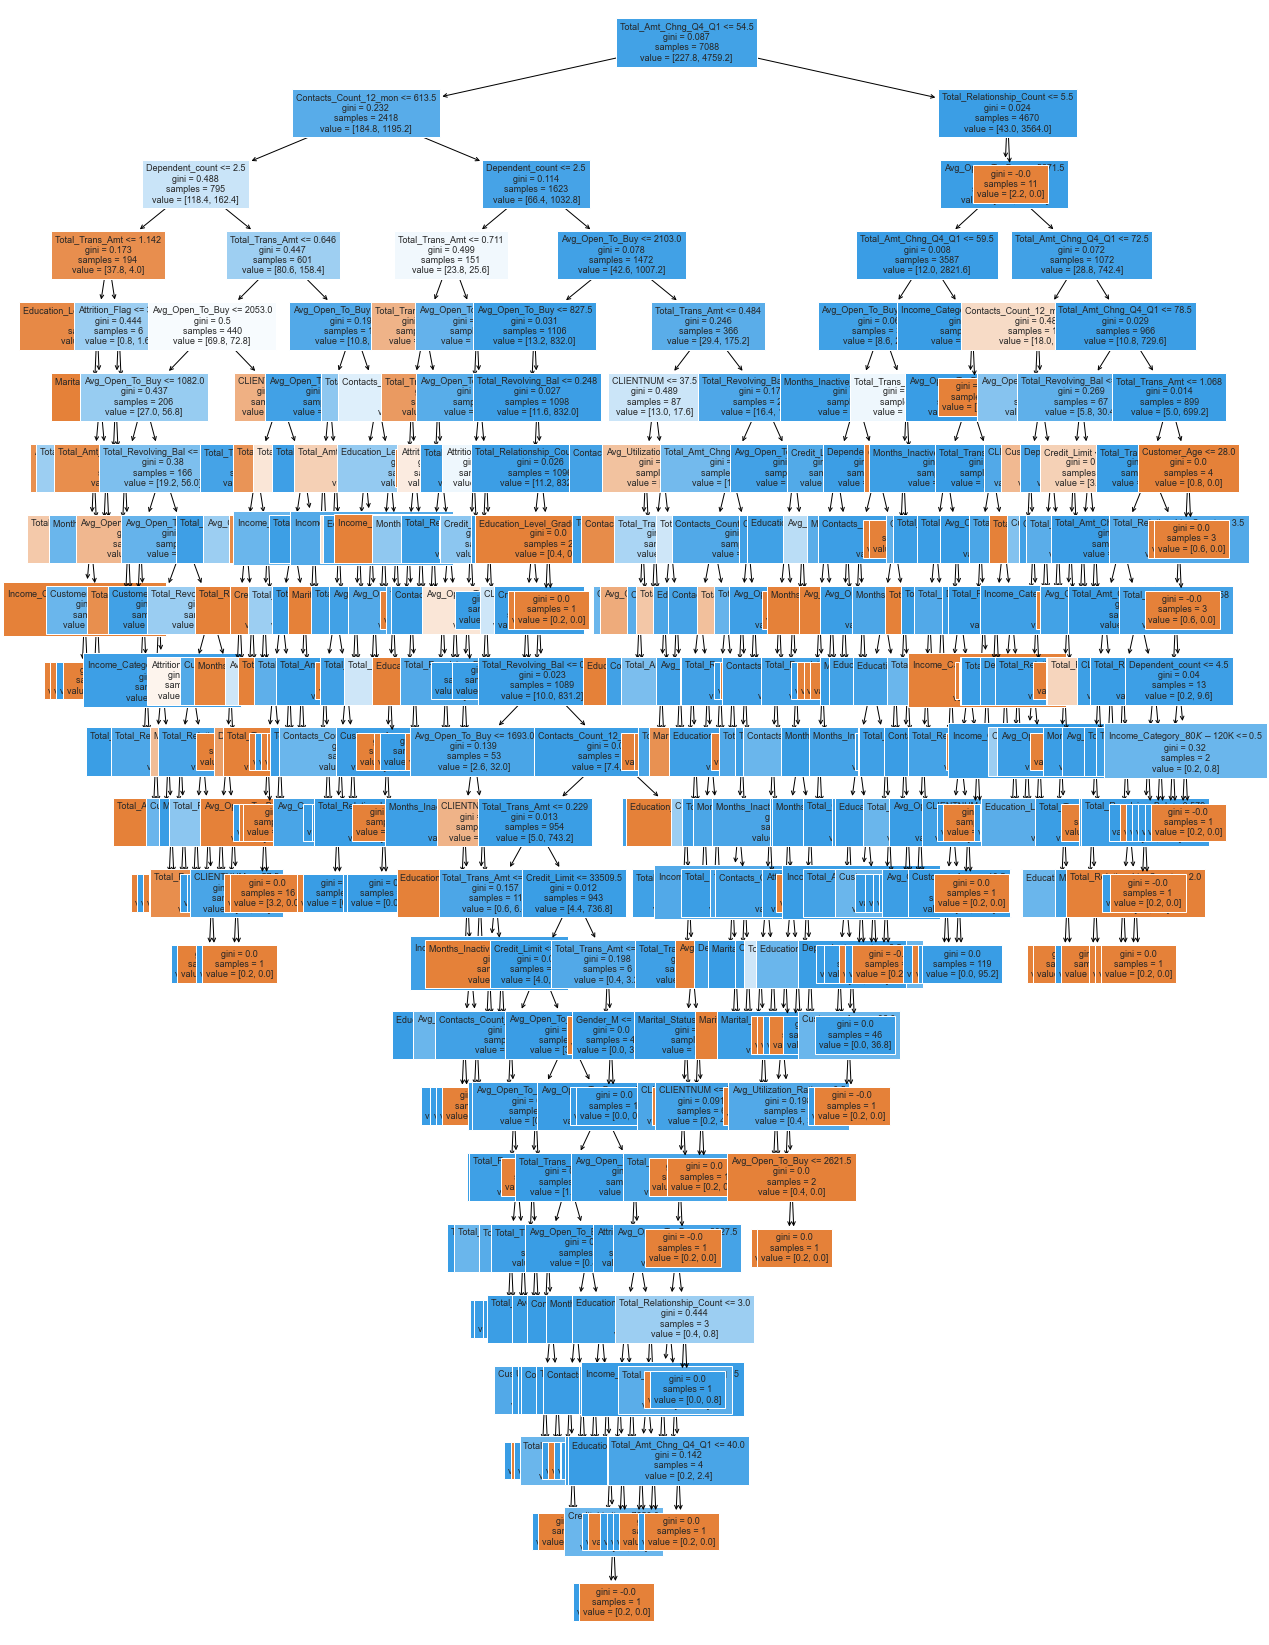

In [181]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(DT_Model,feature_names=feature_names ,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Gridsearch for HyperParamenter Tuning:

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.20,1:.80})

parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=1, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

In [185]:
#Confusion Matrix
y_predict = estimator.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [186]:
df_cm

Predicted - No  Predicted - Yes
Actual - No                0              488
Actual - Yes               0             2551

In [187]:
pred_train = estimator.predict(X_train)
pred_test = estimator.predict(X_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)

Recall on training set :  1.0
Recall on test set :  1.0


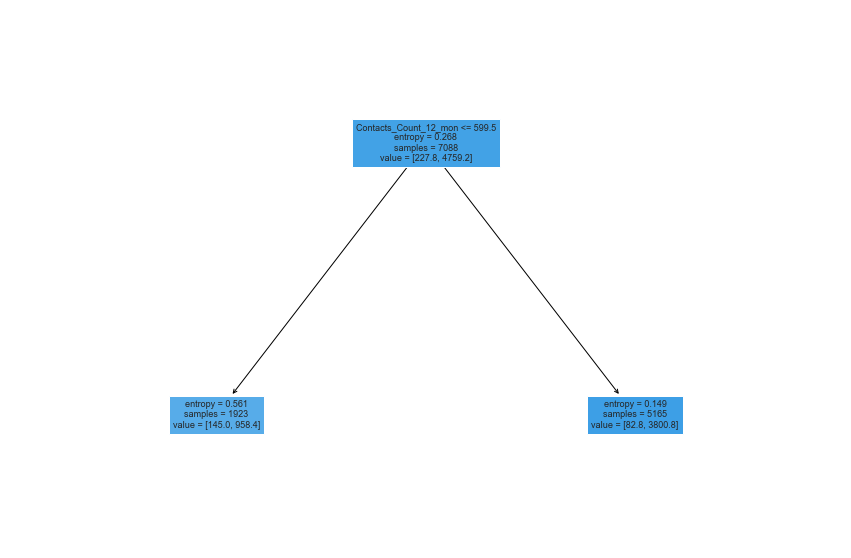

In [188]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Boosting:

### AdaBoost Classifier:

In [189]:
Ada_classifier = AdaBoostClassifier(random_state=1)
Ada_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [190]:
pred_train = Ada_classifier.predict(X_train)
pred_test = Ada_classifier.predict(X_test)

#Accuracy
train_acc = Ada_classifier.score(X_train,y_train)
test_acc = Ada_classifier.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [191]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.9612020316027088
Accuracy on test set :  0.9601842711418229
Recall on training set :  0.9810052109598252
Recall on test set :  0.9811838494707957
Precision on training set :  0.9729909969989997
Precision on test set :  0.9716614906832298


In [192]:
#Confusion Matrix
y_predict = Ada_classifier.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])


In [193]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              415               73
Actual - Yes              48             2503

### Gradient Boosting Classifier:

In [194]:
Grad_Classifier = GradientBoostingClassifier(random_state=1)
Grad_Classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [195]:
pred_train = Grad_Classifier.predict(X_train)
pred_test = Grad_Classifier.predict(X_test)

#Accuracy
train_acc = Grad_Classifier.score(X_train,y_train)
test_acc = Grad_Classifier.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [196]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.9771444695259593
Accuracy on test set :  0.9631457716354064
Recall on training set :  0.9929399899142713
Recall on test set :  0.9882399059192474
Precision on training set :  0.9800895968143355
Precision on test set :  0.9684978870533999


In [197]:
#Confusion Matrix
y_predict = Grad_Classifier.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [198]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              406               82
Actual - Yes              30             2521

### XGBoost Classifier:

In [199]:
XG_Classifier = XGBClassifier(random_state=1)
XG_Classifier.fit(X_train,y_train)

[03:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [200]:
pred_train = XG_Classifier.predict(X_train)
pred_test = XG_Classifier.predict(X_test)

#Accuracy
train_acc = XG_Classifier.score(X_train,y_train)
test_acc = XG_Classifier.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [201]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  1.0
Accuracy on test set :  0.9703849950641659
Recall on training set :  1.0
Recall on test set :  0.9886319090552724
Precision on training set :  1.0
Precision on test set :  0.9763840495547813


In [202]:
#Confusion Matrix
y_predict = XG_Classifier.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [203]:
df_cm

Predicted - No  Predicted - Yes
Actual - No              427               61
Actual - Yes              29             2522

## HyperParameter Tuning:

### AdaBoost Classifier:

In [204]:
Ada_classifier_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Grid search
grid_obj = GridSearchCV(Ada_classifier_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Ada_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Ada_classifier_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [205]:
pred_train = Ada_classifier_tuned.predict(X_train)
pred_test = Ada_classifier_tuned.predict(X_test)

#Accuracy
train_acc = Ada_classifier_tuned.score(X_train,y_train)
test_acc = Ada_classifier_tuned.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [206]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.8393058690744921
Accuracy on test set :  0.8394208621256992
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8393058690744921
Precision on test set :  0.8394208621256992


In [207]:
#Confusion Matrix
y_predict = Ada_classifier_tuned.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [208]:
df_cm

Predicted - No  Predicted - Yes
Actual - No                0              488
Actual - Yes               0             2551

### Gradient Boost Classifier:

In [209]:
Grad_Classifier_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
Grad_Classifier_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [210]:
pred_train = Grad_Classifier_init.predict(X_train)
pred_test = Grad_Classifier_init.predict(X_test)

#Accuracy
train_acc = Grad_Classifier_init.score(X_train,y_train)
test_acc = Grad_Classifier_init.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [211]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

Accuracy on training set :  0.9788374717832957
Accuracy on test set :  0.9651201052977953
Recall on training set :  0.9939485627836612
Recall on test set :  0.9898079184633477
Precision on training set :  0.9810851169736187
Precision on test set :  0.9692898272552783


#### Gradient Boosting Tuned:

In [ ]:
Grad_Classifier_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Grid search
grid_obj = GridSearchCV(Grad_Classifier_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Grad_Classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Grad_Classifier_tuned.fit(X_train, y_train)

In [ ]:
pred_train = Grad_Classifier_tuned.predict(X_train)
pred_test = Grad_Classifier_tuned.predict(X_test)

#Accuracy
train_acc = Grad_Classifier_tuned.score(X_train,y_train)
test_acc = Grad_Classifier_tuned.score(X_test,y_test)

#Recall
train_recall = metrics.recall_score(y_train,pred_train)
test_recall = metrics.recall_score(y_test,pred_test)

#Precision
train_precision = metrics.precision_score(y_train,pred_train)
test_precision = metrics.precision_score(y_test,pred_test)

In [ ]:
print("Accuracy on training set : ",train_acc)
print("Accuracy on test set : ",test_acc)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)
print("Precision on training set : ",train_precision)
print("Precision on test set : ",test_precision)

In [ ]:
#Confusion Matrix
y_predict = Grad_Classifier_tuned.predict(X_test)
cm=metrics.confusion_matrix( y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
              columns = [i for i in ['Predicted - No','Predicted - Yes']])

In [ ]:
df_cm

In [4]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'LR with Oversampled Data', 'LR-Regulairized(Oversampling)',
                                          'LR with Undersampling','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights',
                                          'Initial decision tree model','Decision tree with hyperparameter tuning',
                                          'AdaBoost Classifier with default parameters',
                                         'Gradient Boosting Classifier with default parameters','XGBoost Classifier with default parameters',
                                         'Tuned AdaBoost Classifier_Grid','Tuned Gradient Boosting_Grid'], 'Train_Recall':[0.96,0.80,0.85,0.80,0.99,1,0.96,1,0.99,0.99,1,1,0.98,0.99,1,1,0.92], 'Test_Recall':[0.96,0.80,0.85,0.80,0.97,1,0.97,0.98,0.98,0.99,0.96,1,0.98,0.98,0.98,1,0.56]}) 
comparison_frame

Model  Train_Recall  \
0                                 Logistic Regression          0.96   
1                            LR with Oversampled Data          0.80   
2                       LR-Regulairized(Oversampling)          0.85   
3                               LR with Undersampling          0.80   
4          Bagging classifier with default parameters          0.99   
5                            Tuned Bagging Classifier          1.00   
6           Bagging classifier with base_estimator=LR          0.96   
7               Random Forest with deafult parameters          1.00   
8                      Tuned Random Forest Classifier          0.99   
9                    Random Forest with class_weights          0.99   
10                        Initial decision tree model          1.00   
11           Decision tree with hyperparameter tuning          1.00   
12        AdaBoost Classifier with default parameters          0.98   
13  Gradient Boosting Classifier with default para...          0.99   
14         XGBoost Classifier with default parameters          1.00   
15                     Tuned AdaBoost Classifier_Grid          1.00   
16                       Tuned Gradient Boosting_Grid          0.92   

    Test_Recall  
0          0.96  
1          0.80  
2          0.85  
3          0.80  
4          0.97  
5          1.00  
6          0.97  
7          0.98  
8          0.98  
9          0.99  
10         0.96  
11         1.00  
12         0.98  
13         0.98  
14         0.98  
15         1.00  
16         0.56